In [1]:
import urllib.request as req
import gzip, os, os.path

savepath = "./mnist"
baseurl = "http://yann.lecun.com/exdb/mnist"

files = [
    "train-images-idx3-ubyte.gz",
    "train-labels-idx1-ubyte.gz",
    "t10k-images-idx3-ubyte.gz",
    "t10k-labels-idx1-ubyte.gz"]



# 다운로드

if not os.path.exists(savepath): os.mkdir(savepath)

for f in files:
    url = baseurl + "/" + f
    loc = savepath + "/" + f
    print("download:", url)
    if not os.path.exists(loc):
        req.urlretrieve(url, loc)

for f in files:   # 압축 해제
    gz_file = savepath + "/" + f
    raw_file = savepath + "/" + f.replace(".gz", "")
    print("gzip:", f)
    with gzip.open(gz_file, "rb") as fpb
        body = fp.read()
        with open(raw_file, "wb") as w:
            w.write(body)

print("ok")

download: http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
gzip: train-images-idx3-ubyte.gz
gzip: train-labels-idx1-ubyte.gz
gzip: t10k-images-idx3-ubyte.gz
gzip: t10k-labels-idx1-ubyte.gz
ok


In [3]:
import struct
def to_csv(name, maxdata):

    # 레이블 파일과 이미지 파일 열기
    lbl_f = open("./mnist/"+name+"-labels-idx1-ubyte", "rb")
    img_f = open("./mnist/"+name+"-images-idx3-ubyte", "rb")
    csv_f = open("./mnist/"+name+".csv", "w", encoding="utf-8")
    
    # 헤더 정보 읽기 
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8))
    mag, img_count = struct.unpack(">II", img_f.read(8))
    rows, cols = struct.unpack(">II", img_f.read(8))
    pixels = rows * cols

    # 이미지 데이터를 읽고 CSV로 저장
    res = []
    for idx in range(lbl_count):
        if idx > maxdata: break
            
        label = struct.unpack("B", lbl_f.read(1))[0]
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))
        csv_f.write(str(label)+",")
        csv_f.write(",".join(sdata) + "\r\n")

        if idx < 10:    # 잘 저장됐는지 이미지 파일로 저장해서 테스트
            s = "P2 28 28 255\n"
            s += " ".join(sdata)
            iname = "./mnist/{0}-{1}-{2}.pgm".format(name,idx,label)
            with open(iname, "w", encoding="utf-8") as f:
                f.write(s)
    csv_f.close()
    lbl_f.close()
    img_f.close()

to_csv("train", 1000)  # 결과를 파일로 출력
to_csv("t10k", 500)

In [8]:
def load_csv(fname):
    labels = []
    images = []
    with open(fname, "r") as f:
        for line in f:
            cols = line.split(",")
            if len(cols) < 2: continue
            labels.append(int(cols.pop(0)))
            vals = list(map(lambda n: int(n) / 256, cols))
            images.append(vals)
    return {"labels":labels, "images":images}

data = load_csv("./mnist/train.csv")
test = load_csv("./mnist/t10k.csv")

In [15]:
data = load_csv("mnist/train.csv")

In [17]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
#clf = svm.SVC()
clf = svm.LinearSVC(C=0.01)
clf.fit(data['images'], data['labels'])
predict = clf.predict(test['images'])

In [33]:
print(metrics.accuracy_score(test['labels'], predict))
print(metrics.classification_report(test['labels'], predict))

0.8522954091816367
             precision    recall  f1-score   support

          0       0.91      1.00      0.95        42
          1       0.97      1.00      0.99        67
          2       0.88      0.82      0.85        55
          3       0.92      0.78      0.85        46
          4       0.82      0.85      0.84        55
          5       0.78      0.76      0.77        50
          6       0.86      0.84      0.85        43
          7       0.73      0.92      0.81        49
          8       0.85      0.72      0.78        40
          9       0.81      0.78      0.79        54

avg / total       0.86      0.85      0.85       501



In [51]:
len(data['images'][0])

784

In [53]:
# 이미지를 시각화
from PIL import Image
import matplotlib.pyplot as plt

In [54]:
arr = np.array([test['images'][0]])

In [57]:
new_predict = clf.predict(arr)
new_predict

array([7])

In [64]:
test['labels'][0]

7

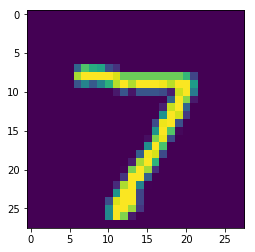

In [76]:
plt.imshow(np.array(test['images'][0]).reshape(28,28))